Selección de características
===

* 60:00 min | Última modificación: Abril 5, 2021 | [YouTube]

* Idenfiticar las características más importantes

* Remover irrelevantes o redundates

* Mejora la interpretavilidad y capacidad predictiva del modelo

## Técnicas

* Métodos de filtrado
    - Selección de las mejores características.
    - Desarrollo del modelo.
    - Análisis del desempeño.

* Basados en modelos
    - Desarrollo del modelo.
    - Selección de características basadas en el desempeño del modelo.
    - Selección backward, forward, mixtos.

* Métodos embebidos
    - Selección de un subconjunto de características.
    - Desarrollo del modelo.
    - Desempeño.
    - Retorno al paso 1.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target



## Variance Threshold

In [4]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.3)
sel.fit_transform(X)[:10]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])

## Características correlacionadas

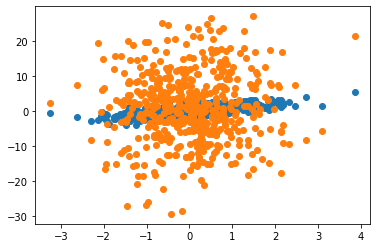

In [7]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


np.random.seed(42)
x1 = np.random.normal(0, 1, 500)
x2 = x1 + np.random.normal(0, 1, 500)
x3 = x1 + np.random.normal(0, 10, 500)

plt.scatter(x1, x2)
plt.scatter(x1, x3)

In [8]:
display(
    pearsonr(x1, x2),
    pearsonr(x1, x3)
)

(0.6811405918134971, 1.9520324398684079e-69)

(0.03937486620402585, 0.37962586391466446)

In [10]:
display(
    pearsonr(X[:, 0], X[:, 1]),
    pearsonr(X[:, 0], X[:, 2]),
    pearsonr(X[:, 0], X[:, 3])
)

(-0.11756978413300206, 0.15189826071144766)

(0.8717537758865831, 1.0386674194498099e-47)

(0.8179411262715756, 2.325498079793272e-37)

## Información mutua

In [11]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X, y)

array([0.48451775, 0.20941727, 0.99280814, 0.98327118])

## Chi-squared

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
X_new[:10]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])